<center> </center>

<center><font size=5 face="Helvetica" color=#306998><b>
MPB Tutorial: Bandstructure of Periodic Dielectric Waveguides

</b></font></center>

<center><font face="Helvetica" size=3><b>Ang Chen</b></font></center>
<center><font face="Helvetica" size=3>February, 2025</font></center>

***

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import meep as mp
from meep import mpb

# rc('text', usetex=True)
plt.rcParams["font.family"] = "Helvetica"
%matplotlib inline
%config InlineBackend.figure_format='svg'

We simulate the structure of Fig. 5 in Chap. 7 of the book, `Photonic Crystals-Molding the Flow of Light`.

In [2]:
resolution = 20  # pixels/a

a = 0.500         # units of um
r = 0.25*a        # units of um
h = 0.4*a         # units of um
w = 1.0*a         # units of um

r = r/a          # units of "a"
h = h/a          # units of "a"
w = w/a          # units of "a"

nSi = np.sqrt(12)
Si = mp.Medium(index=nSi)

In [3]:
geometry_lattice = mp.Lattice(size=mp.Vector3(1,4,4))

geometry = [ mp.Block(center=mp.Vector3(), size=mp.Vector3(mp.inf,w,h), material=Si),
             mp.Cylinder(center=mp.Vector3(), radius=r, height=mp.inf, material=mp.air) ]

num_k = 30
k_points = mp.interpolate(num_k, [mp.Vector3(0,0,0), mp.Vector3(0.5,0,0)])
k_parallel = np.zeros(len(k_points))
k_parallel= np.linspace(0, 1/2, len(k_points))

num_bands = 3

ms = mpb.ModeSolver(geometry_lattice=geometry_lattice,
                    geometry=geometry,
                    k_points=k_points,
                    resolution=resolution,
                    num_bands=num_bands)

In [4]:
ms.run_yodd_zeven()
yodd_zeven_freqs = ms.all_freqs

ms.run_yeven_zeven()
yeven_zeven_freqs = ms.all_freqs

ms.run_yodd_zodd()
yodd_zodd_freqs = ms.all_freqs

ms.run_yeven_zodd()
yeven_zodd_freqs = ms.all_freqs


Initializing eigensolver data
Computing 3 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 20 x 80 x 80.
Solving for 3 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 4, 0)
     (0, 0, 4)
Cell volume = 16
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.25, -0)
     (0, -0, 0.25)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1,0.4)
          axes (1,0,0), (0,1,0), (0,0,1)
     cylinder, center = (0,0,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 6 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: zevenyodd.
Initializing fields to random numbers...
32 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.016129032258064516, 0.0, 0.0>
  Vector3<0.03225806451612903, 0.0, 0.0>
  Vector3<0.04838709677419355, 0.0, 0.0>
  Vector3<0.06451612903225806, 0.0, 0.0>
  Vector3<0.0806451

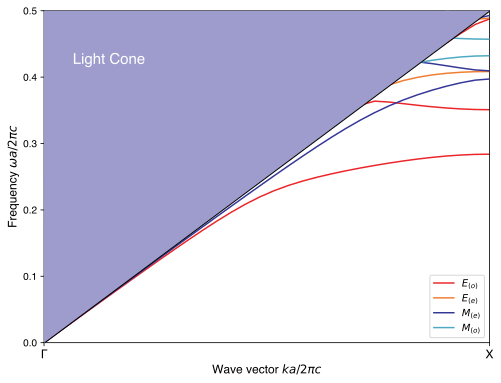

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

x = range(len(yodd_zeven_freqs))

for i in range(yodd_zeven_freqs.shape[1]):
    if i==0:
        ax.plot(x, yodd_zeven_freqs[:,i], color='#EB262A', linestyle='-', lw=1.5, label=r'$E_{(o)}$', zorder=1)
        ax.plot(x, yeven_zeven_freqs[:,i], color='#F07D31', linestyle='-', lw=1.5, label=r'$E_{(e)}$', zorder=2)
        ax.plot(x, yeven_zodd_freqs[:,i], color='#343796', linestyle='-', lw=1.5, label=r'$M_{(e)}$', zorder=3)
        ax.plot(x, yodd_zodd_freqs[:,i], color='#4DAAC2', linestyle='-', lw=1.5, label=r'$M_{(o)}$', zorder=4)
    else:
        ax.plot(x, yodd_zeven_freqs[:,i], color='#EB262A', linestyle='-', lw=1.5, zorder=1)
        ax.plot(x, yeven_zeven_freqs[:,i], color='#F07D31', linestyle='-', lw=1.5, zorder=2)
        ax.plot(x, yeven_zodd_freqs[:,i], color='#343796', linestyle='-', lw=1.5, zorder=3)
        ax.plot(x, yodd_zodd_freqs[:,i], color='#4DAAC2', linestyle='-', lw=1.5, zorder=4)
        # ax.plot(x, yodd_zeven_freqs[:,i], 'o',color='r', markerfacecolor="none", ms=3)
ax.plot([x[0], x[-1]], [0, 0.5], color='#000000', linestyle='-', lw=2, zorder=5)
ax.fill_between(x, k_parallel/1, 0.5, facecolor='#9D9CCC', alpha=1, zorder=5)

ax.set_ylim([0, .5])
ax.set_xlim([x[0], x[-1]])

tick_locs = [0, len(k_points) - 1]
tick_labs = [r"$\Gamma$", "X"]
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=12)
ax.set_xlabel("Wave vector $ka/2\pi c$", size=12)
ax.set_ylabel(r"Frequency $\omega a/2\pi c$", size=12)
ax.legend(loc=4)
ax.text(2, 0.42, "Light Cone", color="w", zorder=6, size=15)

plt.show()